In [12]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("file.csv")
df.head()

,Answer_Type,Topic_Number,Variation,Difficulty_Level
0,1,30102,105,3
1,1,30102,105,3
2,1,30102,105,3
3,1,30102,105,3
4,1,30102,105,3


Text(0, 0.5, 'Difficulty_Level')

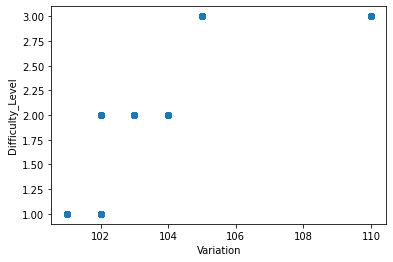

In [10]:
plt.scatter(df.Variation,df['Difficulty_Level'])
plt.xlabel('Variation')
plt.ylabel('Difficulty_Level')

In [9]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Variation','Difficulty_Level']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
km.cluster_centers_

array([[101.3902439 ,   1.18292683],
       [103.875     ,   2.25      ],
       [110.        ,   3.        ]])

In [15]:
df['cluster']=y_predicted
df.head()

,Answer_Type,Topic_Number,Variation,Difficulty_Level,cluster
0,1,30102,105,3,0
1,1,30102,105,3,0
2,1,30102,105,3,0
3,1,30102,105,3,0
4,1,30102,105,3,0


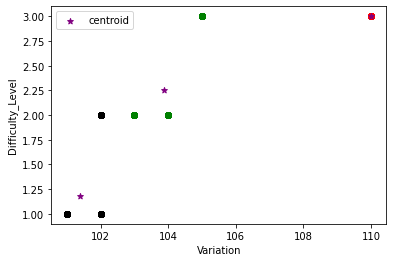

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Variation,df1['Difficulty_Level'],color='green')
plt.scatter(df2.Variation,df2['Difficulty_Level'],color='red')
plt.scatter(df3.Variation,df3['Difficulty_Level'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Variation')
plt.ylabel('Difficulty_Level')
plt.legend()